### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Models 
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

import os

folder_path = '../input/animal-image-datasetdog-cat-and-panda/animals/animals/'
for dirname, _, filenames in os.walk(folder_path):
    print(dirname)

../input/animal-image-datasetdog-cat-and-panda/animals/animals/
../input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs
../input/animal-image-datasetdog-cat-and-panda/animals/animals/panda
../input/animal-image-datasetdog-cat-and-panda/animals/animals/cats


In [2]:
print('Total cats images:', len(os.listdir(folder_path + 'cats')))
print('Total dogs images:', len(os.listdir(folder_path + 'dogs')))
print('Total pandas images:', len(os.listdir(folder_path + 'panda')))

Total cats images: 1000
Total dogs images: 1000
Total pandas images: 1000


In [3]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Show some images

Text(0.5, 1.0, 'Fourth')

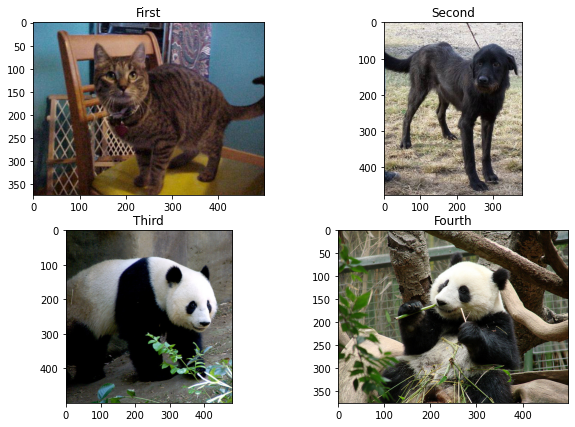

In [4]:
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = image.load_img(folder_path + 'cats/cats_00001.jpg')
Image2 = image.load_img(folder_path + 'dogs/dogs_00001.jpg')
Image3 = image.load_img(folder_path + 'panda/panda_00001.jpg')
Image4 = image.load_img(folder_path + 'panda/panda_00003.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Fourth")

#### Split data : 80% train, 20% validation

In [5]:
train_datagen = ImageDataGenerator(
                fill_mode = 'nearest',
                validation_split=0.2
)

In [6]:
train_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
)
validation_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [7]:
from keras.applications import ResNet50
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(108,108,3), include_top=False),
])
for layer in model.layers:
  layer.trainable = False

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
conv2d (Conv2D)              (None, 2, 2, 64)          1179712   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________

In [8]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=25,
                    verbose=1,
                    )

Epoch 1/25
75/75 [==============================] - 38s 392ms/step - loss: 1.8237 - accuracy: 0.6816 - val_loss: 0.4622 - val_accuracy: 0.8500
Epoch 2/25
75/75 [==============================] - 13s 174ms/step - loss: 0.3802 - accuracy: 0.8593 - val_loss: 0.2975 - val_accuracy: 0.8967
Epoch 3/25
75/75 [==============================] - 13s 169ms/step - loss: 0.3030 - accuracy: 0.9205 - val_loss: 0.3336 - val_accuracy: 0.8867
Epoch 4/25
75/75 [==============================] - 13s 171ms/step - loss: 0.1920 - accuracy: 0.9296 - val_loss: 0.2697 - val_accuracy: 0.9167
Epoch 5/25
75/75 [==============================] - 13s 167ms/step - loss: 0.1613 - accuracy: 0.9421 - val_loss: 0.2644 - val_accuracy: 0.9233
Epoch 6/25
75/75 [==============================] - 12s 166ms/step - loss: 0.1257 - accuracy: 0.9500 - val_loss: 0.3849 - val_accuracy: 0.9017
Epoch 7/25
75/75 [==============================] - 13s 173ms/step - loss: 0.0635 - accuracy: 0.9773 - val_loss: 0.3215 - val_accuracy: 0.9133

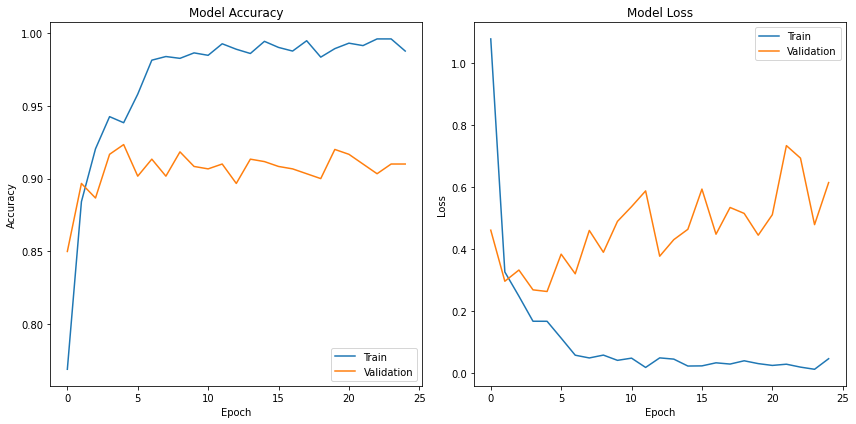

In [13]:
# Plot Model accuracy and loss 
plt.figure(figsize=(12, 6))

# Plot Model accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot Model Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()  
plt.show()